<a href="https://colab.research.google.com/github/EhsanHonarvar/Practices/blob/main/1_ACT_BTW16M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/gauravduttakiit/bitcoin-tweets-16m-tweets-with-sentiment-tagged")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ehsanhonarvar
Your Kaggle Key: ··········


100%|██████████| 1.10G/1.10G [00:06<00:00, 175MB/s]


In [ ]:
import pandas as pd

# reading the XLSX file
file =('bitcoin-tweets-16m-tweets-with-sentiment-tagged/mbsa.csv')
tweets = pd.read_csv(file)

# displaying the contents of the XLSX file
tweets.head()

,Date,text,Sentiment
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive


In [ ]:
# newData.to_csv('dataBitCoin16M.csv')
# !cp dataBitCoin16M.csv "drive/My Drive/Datasets/"

In [ ]:
# !ls
# https://drive.google.com/file/d/1jAFhXiIc0AT5OoqDrVx_z5rLlhA2Da4m/view?usp=share_link

bitcoin-tweets-16m-tweets-with-sentiment-tagged  drive
dataBitCoin16M.csv				 sample_data


In [ ]:
import numpy as np

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=c4b57353938be1cdf7c1d64e656f3d8c4c74a89c1aafafa8ac456204504ece10
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop_words


In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from stop_words import get_stop_words
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from tqdm import tqdm

In [ ]:
# tweets = pd.read_csv('/kaggle/input/bitcoin-tweets-16m-tweets-with-sentiment-tagged/mbsa.csv')
# tweets.head()

In [ ]:
len(tweets)

19344048

In [ ]:
tweets = tweets.iloc[:,1:]
tweets.head()

,text,Sentiment
0,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive
1,Cardano: Digitize Currencies; EOS https://t.co...,Positive
2,Another Test tweet that wasn't caught in the s...,Positive
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive


In [ ]:
tweets.Sentiment = tweets.Sentiment.apply(lambda x: str(x).lower())
tweets.Sentiment = tweets.Sentiment.map(lambda x: 1 if x=='positive' else 0)
tweets.head()

,text,Sentiment
0,È appena uscito un nuovo video! LES CRYPTOMONN...,1
1,Cardano: Digitize Currencies; EOS https://t.co...,1
2,Another Test tweet that wasn't caught in the s...,1
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,1
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,1


In [ ]:
df = tweets.sample(5000000)

df.head()
print('Total Sample: ',len(df))
print(df.groupby(df.Sentiment).count())


Total Sample:  5000000
              text
Sentiment         
0          2744795
1          2255203


In [ ]:
######## DATA CLEANING ########
stop_words = get_stop_words('english')

len(stop_words)

174

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
ps = PorterStemmer()
corpus = []
for i in tqdm(df.text):
    new = re.sub('[^a-zA-z]', ' ',str(i))
    new = new.lower()
    new = nltk.word_tokenize(new)
    new = [ps.stem(i) for i in new if i not in stop_words]
    new = ' '.join(new)
    corpus.append(new)

df.text = corpus
df.head()

,text,Sentiment
14979680,video interview ricardo p rez marco lightn net...,0
5129504,liquid bitcoin,1
8805429,http t co vbgcw bsvm http t co uzzxbvbgff join...,1
2205516,bitcoin price,0
2492331,video c mo funciona bitcoin criptomoneda http ...,1


In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = str(tweet).lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # remove links from text
    text = re.sub(r'http\S+', '', text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
cleantext=[]
for item in tqdm(df['text']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df.head()

100%|██████████| 5000000/5000000 [3:09:46<00:00, 439.10it/s]


,text,Sentiment,cleantext
17578333,#Sterling fragile as #EU weighs up new #Brexit...,1,"[sterl, fragil, eu, weigh, new, brexit, extens..."
3417746,@btc_reddit,0,"[btc, reddit]"
15120109,@katyperry Get #free #Bitcoin\n#bitcoinmining ...,0,"[katyperri, get, free, bitcoin, bitcoinmin, co..."
3856586,@btc_current,0,"[btc, current]"
9281674,Aggiornamento su tutti i mercati. Cosa seguire...,1,"[aggiornamento, su, tutti, mercati, cosa, segu..."


In [ ]:
########### Language Detection ###########

import fasttext

class LanguageDetector(object):
    def __init__(self, fname: str, label: str="__label__"):
        self._model = fasttext.load_model(fname)
        self.label = label

    def predict(self, text: str):
        prediction, probability = self._model.predict(text, k=1)

        prediction = prediction[0].replace(self.label, "")
        probability = probability[0]

        return prediction, probability

In [ ]:
# model_fname = "../input/fasttextmodel/lid.176.ftz"
model_fname = "../input/lid176bin/lid.176.bin"

lang_detector = LanguageDetector(model_fname)
lang_detector.predict("this is a test")


In [ ]:
def detect_language(text):
    lang, proba = lang_detector.predict(text)
    if proba > 0.67: # it was 0.5
        return lang
    else:
        return None

In [ ]:
lang_detector.predict("ceci est un test de français")

In [ ]:
lang_detector.predict("esta es una prueba de frances")

In [ ]:
lang_detector.predict("这是一个法语测试")

In [ ]:
for item in df:
    df["language"] = detect_language(item[0:])
print(item[:])
#     df["language"] = [detect_language(x) for x in df.text]
#     print(df.text)

print(df.language)
# df["language"] = df.text.apply(detect_language)
df.language.value_counts()

In [ ]:
df.text.head()

In [ ]:
# def tweet_to_words(tweet):
#     ''' Convert tweet text into a sequence of words '''

#     # convert to lowercase
#     text = tweet.lower()
#     # remove non letters
#     text = re.sub(r"[^a-zA-Z0-9]", " ", text)
#     # remove links from text
#     text = re.sub(r'http\S+', '', tex
#     # tokenize
#     words = text.split()
#     # remove stopwords
#     words = [w for w in words if w not in stopwords.words("english")]
#     # apply stemming
#     words = [PorterStemmer().stem(w) for w in words]
#     # return list
#     return words

In [ ]:
# cleantext=[]
# for item in tqdm(df['text']):
#     words=tweet_to_words(item)
#     cleantext+=[words]
# df['cleantext']=cleantext

In [ ]:
# df.head()

In [ ]:
############## It Takes long time #############

# uniqwords=[]
# for sent_item in tqdm(df['cleantext']):
#     for words_of_sent in sent_item:
#         if words_of_sent not in uniqwords: uniqwords += [words_of_sent]


# print(len(uniqwords))

In [ ]:
################################################################
########################## Parameters ########################
################################################################

# vocab_size = 20000  # Only consider the top 20k words
vocab_size = 70000  # Only consider the top 70k words
epochs = 80
n_heads = 6   #Or 3
# maxlen = 200
maxlen = 28 # max_length was 64 or 32

################################################################

In [ ]:
print(df)

                                                       text  Sentiment  \
17578333  #Sterling fragile as #EU weighs up new #Brexit...          1   
3417746                                         @btc_reddit          0   
15120109  @katyperry Get #free #Bitcoin\n#bitcoinmining ...          0   
3856586                                        @btc_current          0   
9281674   Aggiornamento su tutti i mercati. Cosa seguire...          1   
...                                                     ...        ...   
18368767  @jaja2649 @PeterSchiff @YouTube Gold can be ea...          0   
10506948  $EPAZ's Bitcoin Sharing &amp; Blockchain Socia...          0   
9170613   European Central Bank Exec Calls for Fast Regu...          1   
708001                                                   :(          1   
18082668  #bitcoin #btc #blockchain #cryptocurrency #dig...          1   

                                                  cleantext  
17578333  [sterl, fragil, eu, weigh, new, brexit,

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense,Flatten
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv1D,MaxPooling1D

In [ ]:
class TransformerBlock(Layer):
    def __init__(self, d_model, num_heads):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=d_model,)
        self.layernorm1 = LayerNormalization(epsilon=1e-6) #1e-6
        self.layernorm2 = LayerNormalization(epsilon=1e-6) #1e-6
        self.convnet=Sequential(
            [Conv1D(d_model,3,1,padding='same', activation='gelu'),MaxPooling1D(2,1,padding='same'),
             Conv1D(d_model,3,1,padding='same', activation='gelu'),MaxPooling1D(2,1,padding='same'),
             Conv1D(d_model,3,1,padding='same', activation='gelu'),MaxPooling1D(2,1,padding='same'),])
#adding layer normalization

    def call(self, inputs):
        cnn_output = self.convnet(inputs)
        ffn_output = self.layernorm1(cnn_output)
        attn_output = self.att(ffn_output,ffn_output)
        return self.layernorm2(inputs + attn_output)



# class TransformerBlock(Layer):
#     def __init__(self, d_model, num_heads):
#         super(TransformerBlock, self).__init__()
#         self.att = MultiHeadAttention(num_heads=num_heads, key_dim=d_model,)
#         self.layernorm1 = LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = LayerNormalization(epsilon=1e-6)
#         self.convnet1=Sequential(
#             [Conv1D(d_model,6,1,padding='same', activation='relu'),MaxPooling1D(4,1,padding='same'),])
#         self.convnet2=Sequential(
#             [Conv1D(d_model,6,1,padding='same', activation='relu'),MaxPooling1D(4,1,padding='same'),])
# #             [Conv1D(d_model,2,1,padding='same', activation='relu'),MaxPooling1D(2,1,padding='same'),])


#     def call(self, inputs):
#         cnn_output = self.convnet1(inputs)
#         ffn_output = self.convnet2(cnn_output)
#         attn_output = self.att(ffn_output,ffn_output)
#         return self.layernorm2(inputs + attn_output)

In [ ]:
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, d_model):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=d_model)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=d_model)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
def tokenize_pad_sequences(text):
    # Text tokenization
    tokenizer = Tokenizer(num_words=vocab_size, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=maxlen)
    # return sequences
    return X, tokenizer

In [ ]:
#create dataset train test val
from sklearn.model_selection import train_test_split
X, tokenizer = tokenize_pad_sequences(df['cleantext'])
y = pd.get_dummies(df['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (4000000, 28) (4000000, 2)
Validation Set:  (500000, 28) (500000, 2)
Test Set:  (500000, 28) (500000, 2)


In [ ]:
#create model and training
inputs = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, 128)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(128, n_heads)

x = transformer_block(x)
# x = transformer_block(x) # Again
x = GlobalMaxPooling1D()(x) #GlobalAveragePooling1D
x = Dropout(.4)(x)
x = Dense(128, activation='gelu')(x) #sigmoid
x = Dropout(.4)(x)
# outputs = Dense(3, activation="softmax")(x)
outputs = Dense(2, activation="sigmoid")(x) #softmax

In [ ]:
from tensorflow import keras
########
# epochs=70
##########
call back for learning rate, learning rate scheduler
# opt = keras.optimizers.Adam(learning_rate=0.00001) #0.0001
#########
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10,
    decay_rate=0.9)
opt = keras.optimizers.SGD(learning_rate=lr_schedule) # SGD/Adam
##########
tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    amsgrad=False,
    weight_decay=None, #0.05 or 0.001
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="SGD",
    **kwargs
##########
model = Model(inputs=inputs, outputs=outputs)
model.summary()



# opt = keras.optimizers.Adam(learning_rate=0.00001) #0.0001 #AdamW
model.compile(optimizer=opt , loss="categorical_crossentropy", metrics=["accuracy"]) # "or mse"

history = model.fit(X_train,y_train, batch_size=256, epochs=epochs, validation_data=(X_val, y_val))  #

results = model.evaluate(X_val, y_val, verbose=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 token_and_position_embeddin  (None, 28, 128)          8963584   
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 28, 128)          544000    
 ormerBlock)                                                     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)               0   

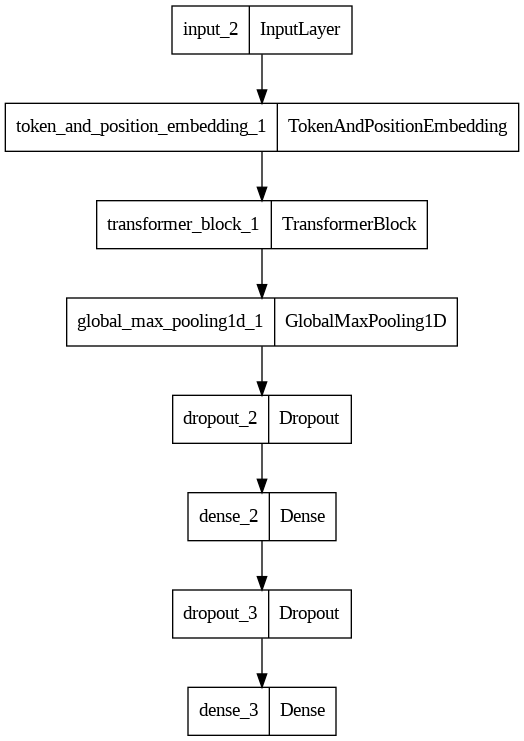

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.6392


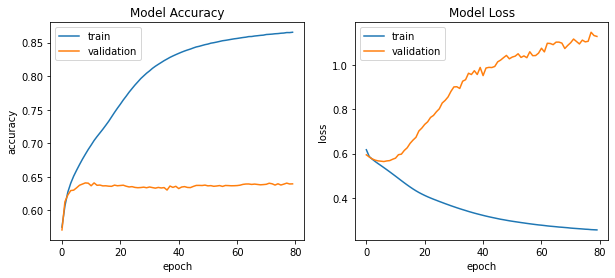

In [ ]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(1,2, figsize=(10,4))
# first plot
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train', 'validation'], loc='best')

# second plot
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(['train', 'validation'], loc='best')

15625/15625 [==============================] - 40s 3ms/step


Text(51.0, 0.5, 'Predicted label')

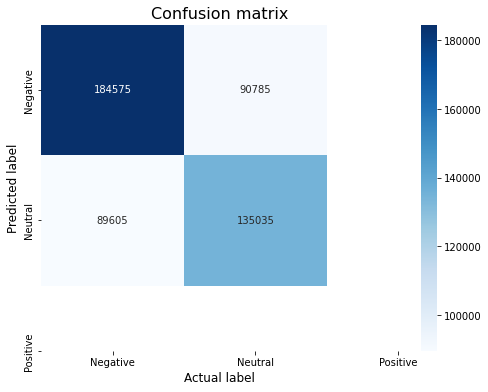

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
'''Function to plot confusion matrix for the passed model and the data'''

sentiment_classes = ['Negative','Neutral', 'Positive']
# use model to do the prediction
y_pred = model.predict(X_test)
# compute confusion matrix
cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))

# plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)

In [ ]:
from google.colab import runtime
runtime.unassign()